<a href="https://colab.research.google.com/github/chrislee973/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def stats(list): 
  #Input: A list of values
  #Output: The mean, variance, and standard deviation of the input list

  #Get length of list
  N = len(list)
  
  #Convert list to array in order to perform math operations on it
  array = np.array(list)

  #Get mean
  mean = array.sum()/ N 

  #Get variance
  var = (((array-mean)**2).sum())/ (N-1)

  #Get std
  std = np.sqrt(var)

  return mean,var,std
  

In [ ]:
sales_mean, sales_var, sales_std = stats( [3505, 2400, 3027, 2798, 3700, 3250, 2689])

print(f"The mean of sales for the past week was {mean}. The variance was {var}. The standard deviation was {std}.")

The mean of sales for the past week was 3052.714285714286. The variance was 214387.90476190473. The standard deviation was 463.0204150595357.


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [ ]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
customers = [127, 80, 105, 92, 120, 115, 93]  

sales_cust_cov = np.cov(sales,customers)[0][1]

sales_cust_cov

7604.357142857142

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [ ]:
customer_std = np.std(customers, ddof=1)

corr_coeff = sales_cust_cov/ (sales_std*customer_std)
corr_coeff

0.9628339778148909

In [ ]:
np.corrcoef(sales,customers)

array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
df = df.iloc[:,1:]
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pclass            1309 non-null   float64
 1   survived          1309 non-null   float64
 2   name              1309 non-null   object 
 3   sex               1309 non-null   object 
 4   age               1310 non-null   float64
 5   sibsp             1309 non-null   float64
 6   parch             1309 non-null   float64
 7   ticket            1309 non-null   object 
 8   fare              1308 non-null   float64
 9   cabin             295 non-null    object 
 10  embarked          1310 non-null   object 
 11  boat              486 non-null    object 
 12  body              121 non-null    float64
 13  home.dest         745 non-null    object 
 14  has_cabin_number  1310 non-null   int64  
dtypes: float64(7), int64(1), object(7)
memory usage: 153.6+ KB


In [ ]:
#Variance-covariance matrix
df.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [ ]:
#Correlation matrix
df.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

They form right angles with one another.

(-2.0, 4.0)

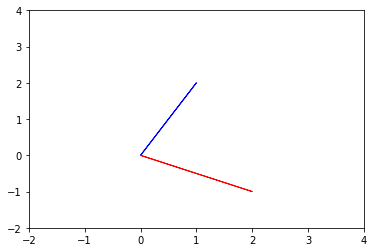

In [ ]:
plt.arrow(0,0,1,2, color='b')
plt.arrow(0,0,2,-1, color='r')

plt.xlim(-2,4)
plt.ylim(-2,4)


## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [ ]:
a = np.array([-5,3,7])
b = np.array([6,-8,2])

np.dot(a,b)

-40

a and b are not orthogonal because their dot product is not zero.

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [ ]:
c = np.array([2,-15,6,20])

norm_sq = np.linalg.norm(c)**2

c_dot_c = np.dot(c,c)

c_T_c = np.dot(c.T,c) 

print(norm_sq)
print(c_dot_c)
print(c_T_c)

665.0
665
665


They all have the same value: 665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

For R^2: 
i^hat = [0,1]
j^hat = [1,0]

For R^3: 
i^hat = [1,0,0]
j^hat = [0,1,0]
k^hat = [0,0,1] 

d = 7 * i^hat + 12*j^hat 

e = 2 * i^hat + 11 * j^hat + (-8) * k^hat

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [ ]:
f = np.array([4,12, 11,9,2])

norm = np.linalg.norm(f)

unit_f = f/norm

unit_f

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

(0.0, 6.0)

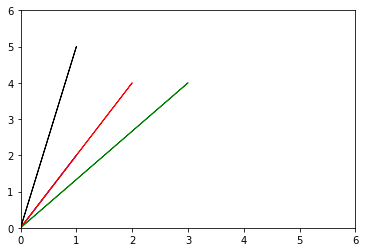

In [ ]:
#Linearly dependent vectors
plt.arrow(0,0,1,2, color='b')
plt.arrow(0,0,2,4, color='r')

#Linearly independent vectors 
plt.arrow(0,0,3,4, color='g')
plt.arrow(0,0,1,5, color='black')


plt.xlim(0,6)
plt.ylim(0,6)

In [ ]:
np.linalg.norm(np.array([1/3, 2/3,2/3]))

1.0

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

(0.0, 9.0)

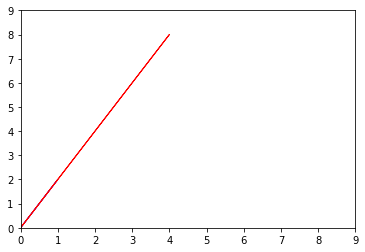

In [ ]:
plt.arrow(0,0,1,2, color='b')
plt.arrow(0,0,4,8, color='r')

plt.xlim(0,9)
plt.ylim(0,9)

y=2x is the span of vectors g and h

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [ ]:
lmn = np.array([[1,2,3],
               [-1,0,7], 
               [4,8,2]])

np.linalg.matrix_rank(lmn)

3

{l,m,n} spans R^3, or all of 3-Dimensional space.

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



(-1.0, 2.0)

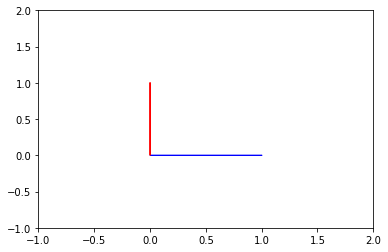

In [ ]:
plt.arrow(0,0,1,0, color='b')
plt.arrow(0,0,0,1, color='r')

plt.xlim(-1,2)
plt.ylim(-1,2)

## 6.2 What does it mean to form a basis?

For vectors to form a basis means that they have to be linearly independent vectors than span the entire space. 

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [ ]:
p = np.array([[1,2,3], 
              [-1,0,7], 
             [4,8,2] ])

np.linalg.matrix_rank(p)

3

The Rank of P is: 3

## 7.2 What does the rank of a matrix tell us?

The rank of a matrix tells us the dimension of the vector space spanned by the rows of the matrix. Or, alternatively, it tells us the number of linearly independent columns. 

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

(-3.0, 4.0)

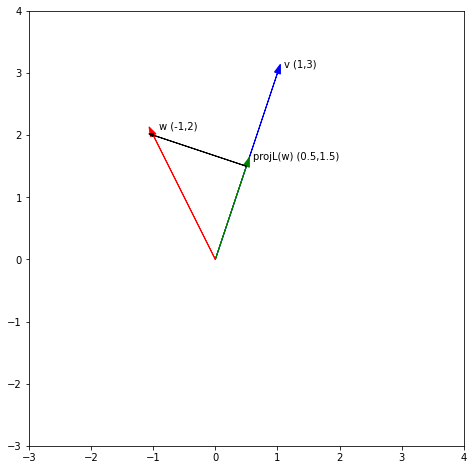

In [182]:
v = np.array([1,3])
w = np.array([-1,2])


#norm_w = np.linalg.norm(w)
norm_v = np.linalg.norm(v)

dot_vw = np.dot(v,w)
norm_projw = dot_vw/norm_v

scale_projw = norm_v/norm_projw

projection_coords = np.array([v[0]/scale_projw,v[1]/scale_projw])

plt.figure(figsize = (20,8))
#Plot w and v
plt.arrow(0,0,v[0],v[1], color='b', head_width = .1 )
plt.arrow(0,0,w[0],w[1], color='r', head_width = .1)

#Plot the span of v 
#plt.arrow(0,0, v[0]*-2, v[1]*-2, color = 'b', linestyle = ':',  linewidth = 1.5, edgecolor='black')

#Plot the projection of w onto v in green
plt.arrow(0,0,projection_coords[0], projection_coords[1] ,color = 'green', head_width=.1)

#draw arrow connecting projection to w in black
plt.arrow(projection_coords[0],projection_coords[1], w[0]-projection_coords[0],w[1]-projection_coords[1], color='black', head_width = .05)

#Annotate points
plt.annotate(f"v ({v[0]},{v[1]})", (v[0] + .1, v[1]+.1))
plt.annotate(f"w ({w[0]},{w[1]})", (w[0] + .1, w[1]+.1))
plt.annotate(f"projL(w) ({projection_coords[0].round(2)},{projection_coords[1].round(2)})", (projection_coords[0] + .1, projection_coords[1]+.1))



plt.gca().set_aspect('equal')

plt.xlim(-3,4)
plt.ylim(-3,4)

In [180]:
projection_coords

array([0.5, 1.5])

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

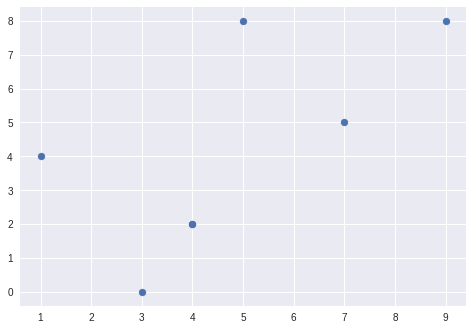

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()